# 3. Distribuições binomial, de Poisson e de Gauss

__1.__ Identifique qual ou quais destas perguntas podem ser respondidas através da distribuição de Poisson, e explique porquê:

__a.__ Num determinado hospital existem __40 camas__ de UCI. A taxa de ocupação média ao
longo de um ano, medida em diferentes semanas é de __21%__. Qual a probabilidade de
__mais de 5 camas__ estarem ocupadas numa __semana__?

In [3]:
N_camas = 40
ocupacao_semanal = N_camas*0.21 # seria o lambda
# P(X>5)=1-P(X<6)=1-P(5)-P(4)-P(3)-P(2)-P(1)-P(0)
# É uma poisson, Discrete, Region of Oportunity, Expected number of events

__b.__ Num centro de radiologia, __400 pessoas__ realizaram uma radiografia do tórax num mês. 
20% tinham menos de 30 anos, 60% entre 30 e 70 anos, e 20% mais de 70 anos.
Qual a probabilidade de 10 pessoas escolhidas terem menos de 30 anos?

In [4]:
# binomial? ter mais de 30 ou ter menos de 30
N_escolhidos = 10
P_sucess = 0.2

__c.__ Num centro de medicina nuclear em média 800 pacientes realizam cintigrafias ósseas
por semana. Qual a probabilidade de num dia, aparecerem 20 pacientes para realizar
uma cintigrafia óssea?

In [5]:
# É Poisson
cintilografias_semanais = 800 # aqui seria o lambda semanal
cintilografias_diarias = cintilografias_semanais / 7 # aqui seria o lambda diário
# P_diaria(X=20)

__d.__ Num centro de radiologia, um dos equipamentos falha em média 5 vezes por ano.
Qual a probabilidade de falhar 2 vezes num mês?

In [6]:
# É Poisson
falha_anual = 5 #lambda
falha_mensal = falha_anual/12
# P_mensal(X=2)

__e.__ Num determinado volume infinitesimal de um fantoma de água, em média, cada eletrão que o atravessa interage 4 vezes. Qual a probabilidade de 0 interações?

In [7]:
# Poisson
media_interacoes = 4 # aqui seria lambda?
# P(X=0)

__2.__ Resolva as alíneas a. e c.

__a.__ Num determinado hospital existem __40 camas__ de UCI. A taxa de ocupação média ao
longo de um ano, medida em diferentes semanas é de __21%__. Qual a probabilidade de
__mais de 5 camas__ estarem ocupadas numa __semana__?

In [8]:
import numpy as np

### Poisson:       $ Pr(X=k) = \frac{\lambda^k e^{-\lambda}}{k!} $

In [9]:
def poisson(k, lamb):
    return (lamb**k)*(np.exp(-lamb))/np.math.factorial(k)

In [10]:
n_camas = 40
taxa_semanal = 0.21*n_camas #lambda

In [11]:
sum_prob = 0
for k in range(6):
    sum_prob = np.sum([sum_prob, poisson(k, taxa_semanal)])
    print(k , poisson(k, taxa_semanal))

0 0.0002248673241788482
1 0.001888885523102325
2 0.007933319197029765
3 0.02221329375168334
4 0.04664791687853503
5 0.07836850035593886


In [12]:
sum_prob # até 5 camas

0.15727678303046816

In [13]:
1 - sum_prob # mais de 5 camas

0.8427232169695318

__c.__ Num centro de medicina nuclear em média 800 pacientes realizam cintigrafias ósseas
por semana. Qual a probabilidade de num dia, aparecerem 20 pacientes para realizar
uma cintigrafia óssea?

In [14]:
cintilografias_semana = 800 # lambda
cintilografias_dia = cintilografias_semana/7
x=20
poisson(x, cintilografias_dia)

1.3805725944459812e-27

In [15]:
from scipy.stats import poisson
poisson.pmf(k=x, mu=cintilografias_dia)

1.3805725944459654e-27

__3.__ No caso da alínea a determine a probabilidade de até 5 camas estarem ocupadas.

In [16]:
sum_probs = 0.0
for x in range(6):
    p_x = poisson.pmf(k=x, mu=taxa_semanal)
    sum_probs = sum([sum_probs, p_x])
    print(x, p_x)

0 0.0002248673241788482
1 0.0018888855231023256
2 0.007933319197029763
3 0.02221329375168334
4 0.04664791687853503
5 0.07836850035593887


In [17]:
sum_probs

0.15727678303046816

__4.__ No caso da alínea e. supondo que por cada interação são depositados em média 50 eV, faça o desenho da distribuição de probabilidades de energia depositada no voxel.

__e.__ Num determinado volume infinitesimal de um fantoma de água, em média, cada eletrão que o atravessa interage 4 vezes. Qual a probabilidade de 0 interações?

In [18]:
interacoes_eletron = 4
energia_depositada = interacoes_eletron*50 # eV
pmf_list = []
for x in range (500):
    pmf_list.append(poisson.pmf(k=x, mu=energia_depositada))

In [19]:
pmf_list

[1.3838965267367376e-87,
 2.767793053473506e-85,
 2.767793053473453e-83,
 1.845195368982327e-81,
 9.225976844911442e-80,
 3.69039073796466e-78,
 1.2301302459881995e-76,
 3.514657845680577e-75,
 8.786644614201492e-74,
 1.9525876920447517e-72,
 3.905175384089584e-71,
 7.100318880162794e-70,
 1.1833864800271105e-68,
 1.820594584657127e-67,
 2.6008494066530395e-66,
 3.467799208870707e-65,
 4.3347490110884e-64,
 5.099704718927573e-63,
 5.66633857658611e-62,
 5.964566922722236e-61,
 5.964566922722179e-60,
 5.680539926402101e-59,
 5.164127205820167e-58,
 4.490545396365253e-57,
 3.742121163637741e-56,
 2.9936969309102093e-55,
 2.3028437930078265e-54,
 1.7058102170428658e-53,
 1.2184358693163306e-52,
 8.403005995285009e-52,
 5.602003996856722e-51,
 3.614196127004265e-50,
 2.258872579377702e-49,
 1.369013684471321e-48,
 8.053021673360767e-48,
 4.601726670491928e-47,
 2.5565148169398827e-46,
 1.3818999010486381e-45,
 7.273157373940103e-45,
 3.72982429432823e-44,
 1.8649121471641202e-43,
 9.097132

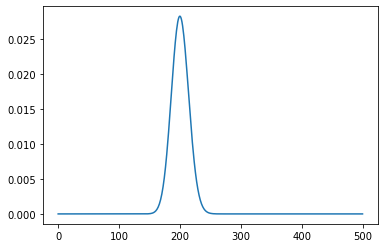

In [20]:
import matplotlib.pyplot as plt
plt.plot(pmf_list)

__5.__ Numa determinada amostra com N=6 mil cintigrafias renais, determinou-se que o valor
mediano da dose efetiva era de 4,2mSv, com um desvio padrão de 1,3 mSv.

In [21]:
N = 6000;   valor_mediano = 4.2;   desvio_padrao = 1.3

__a.__ Em que intervalo de valores em torno do valor mediano encontramos 68% dos casos?

In [22]:
# 0.68 -> 0.34 para cada lado -> entre P(z1)=0.16 e P(z2)=0.84 -> Encontrar os Zs
from statistics import NormalDist

print('z1 =', NormalDist().inv_cdf(0.16))
print('X1 = ', -0.9944578832097528*desvio_padrao + valor_mediano)
print('dX1 =',2.9072047518273214-valor_mediano)

z1 = -0.9944578832097528
X1 =  2.9072047518273214
dX1 = -1.2927952481726788


In [23]:
print('z2 =', NormalDist().inv_cdf(0.84))
print('X2 =', 0.9944578832097528*desvio_padrao + valor_mediano)
print('dX2 =',5.492795248172679-4.2)

z2 = 0.9944578832097528
X2 = 5.492795248172679
dX2 = 1.2927952481726788


In [24]:
1.2927952481726788+1.2927952481726788

2.5855904963453575

__b.__ E 95%?

In [25]:
x1 = (NormalDist().inv_cdf(0.025)*desvio_padrao + valor_mediano)-valor_mediano; x1

-2.5479531799020703

In [26]:
x2 = (NormalDist().inv_cdf(0.975)*desvio_padrao + valor_mediano)-valor_mediano; x2

2.54795317990207

In [27]:
x2-x1

5.09590635980414

__6.__ Foi dada a 50 pacientes uma nova vacina contra covid-19, com probabilidade __para cada
pessoa__ de 50% de ser a vacina e 50% de ser placebo. Em seguida, foram escolhidas 15
pessoas para se realizarem testes.

In [28]:
n = 50;   p = 0.5   

__a.__ Qual a probabilidade de 6 pessoas das 15 terem recebido a vacina?

In [29]:
from scipy.stats import binom
binom.stats(n, p) #mean and variance

(array(25.), array(12.5))

In [30]:
k = 15
binom.pmf(k, n, p)

0.001999138255044388

__b.__ Qual a probabilidade de 3 ou mais pessoas ter recebido a vacina?

In [31]:
sum0a2 = 0
for k in range(3):
    sum0a2 = sum([sum0a2,binom.pmf(k, n, p)])
    print(binom.pmf(k, n, p))

8.881784197001252e-16
4.4408920985006104e-14
1.0880185641326552e-12


In [32]:
1-sum0a2

0.9999999999988667

__c.__ Se em vez de 50 pacientes, tivessem sido 900, e tivéssemos escolhido 600 para estudo,
que distribuição proporia para explicar os dados? Usando esta distribuição determine
a probabilidade de 275 pessoas terem recebido a vacina. Qual é o desvio padrão?

In [33]:
n = 900;  k = 600

__7.__ Num determinado país com 10 milhões de habitantes, a taxa incidência média de uma determinada doença é de 2,3%/ano.

__a.__ calcule a probabilidade de 4200 pessoas terem contraído a doença numa semana.

##### Poisson: $$ Pr(X=k) = \frac{\lambda^k e^{-\lambda}}{k!} $$

In [34]:
lambda_ano = 10000000*0.023; lambda_ano

230000.0

In [35]:
semanas_por_ano = 365.25/7; lambda_semana = lambda_ano/semanas_por_ano; lambda_semana

4407.939767282683

In [36]:
from scipy.stats import poisson
poisson.pmf(4200, lambda_semana)

4.215990470277036e-05

__b.__ <br>
__i.__ Qual a probabilidade de até 4200 pessoas serem infectadas numa semana (ou seja de 0 a 4200)? <br>__ii__ E de serem 4500 pessoas ou mais?

In [37]:
soma = 0
for i in range(4200):
    soma = poisson.pmf(i, lambda_semana) + soma
print('i.', soma)

i. 0.0007828301136447082


In [38]:
n = 4500
poisson.pmf(n, lambda_semana)

0.0022891078994610363

In [39]:
soma = 0
for i in range(n):
    soma = poisson.pmf(i, lambda_semana) + soma
print('ii.', 1-soma)

ii. 0.0842797658363501


__8.__ O intervalo de confiança a 95% das taxas de sobrevivência a 5 anos de 40 mil pacientes tratados com radioterapia para um determinado cancro estava entre os 91 e os 99%.

__a.__ Determine o valor médio da taxa de sobrevivência da amostra.

z = (X – μ) / σ

CI = μ +- z(σ/sqrt(n))
CI intervalo de confiança;   μ = média da amostra;   z = valor do nível de confiança
σ = desvio padrão;   n = tamanho da amostra

In [40]:
import scipy.stats as st
st.norm.ppf(.95)

1.6448536269514722

In [41]:
mu = 40000*0.95; mu

38000.0

__b.__ Determine o seu desvio padrão

In [42]:
print(st.norm.ppf(.91), st.norm.ppf(.99))

1.3407550336902165 2.3263478740408408


In [ ]:
x médio e margem de erro: distancia da média